In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('loan_dataset.csv')

In [21]:
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


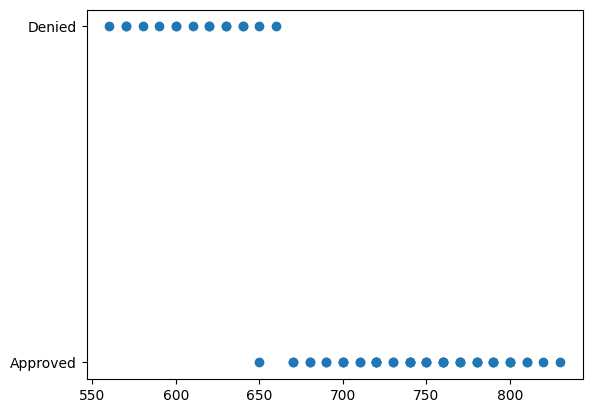

In [22]:
plt.scatter(df['credit_score'], df['loan_status'])

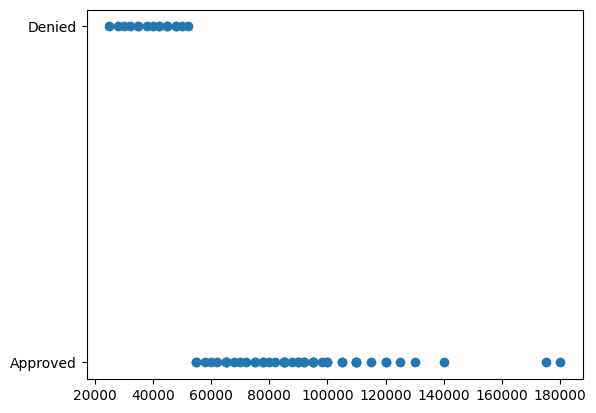

In [23]:
plt.scatter(df['income'], df['loan_status'])

In [24]:
# convert loan_status to binary
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x == 'Denied' else 1)
# normalizing the data scince it has really big values
df['credit_score'] = (df['credit_score'] - df['credit_score'].min()) / (df['credit_score'].max() - df['credit_score'].min())
df['income'] = (df['income'] - df['income'].min()) / (df['income'].max() - df['income'].min())
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,0.387097,0.592593,1
1,45,Female,Teacher,Master's,Single,0.238710,0.444444,1
2,28,Male,Student,High School,Single,0.000000,0.111111,0
3,51,Female,Manager,Bachelor's,Married,0.516129,0.814815,1
4,36,Male,Accountant,Bachelor's,Married,0.322581,0.555556,1


In [25]:
# using the credit score and income as features
x = df[['credit_score', 'income']].values
# 3. Loan class prediction (Multi-class prediction, A/B/C): Credit Score > 750 = A, Credit Score > 650 and < 750 = B, Credit Score < 650 = C category. 
# prepare the target variable
y_cat = df['credit_score'].apply(lambda x: 'A' if x > 0.75 else 'B' if x > 0.65 else 'C').values

# one hot encoding the target variable do one hot encoding without using any library
# y0 is 1 for A, 0 for B and 0 for C
# y1 is 0 for A, 1 for B and 0 for C
# y2 is 0 for A, 0 for B and 1 for C

y = np.zeros((y_cat.size, 3))
for i in range(y_cat.size):
    if y_cat[i] == 'A':
        y[i, 0] = 1
    elif y_cat[i] == 'B':
        y[i, 1] = 1
    else:
        y[i, 2] = 1

In [26]:
# test train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
def sigmoid(x):
    # print(1 + np.exp(-x))
    return 1 / (1 + np.exp(-x))

def logistic_func(theta, x):
    # Logistic function for predictions
    # print(x)
    # print(np.dot(x, theta))
    return sigmoid(np.dot(x, theta))

def cost_func(theta, x, y):
    # Logistic regression cost function
    m = x.shape[0]
    logistic = logistic_func(theta, x)
    cost = -(1/m) * np.sum(y * np.log(logistic + 1e-9) + (1 - y) * np.log(1 - logistic + 1e-9))
    return cost

def gradient(theta, x, y):
    m = x.shape[0]
    # print(r)
    return (1/m) *  np.dot(x.T,  logistic_func(theta, x) - y)

def fit(x, y, alpha=0.1, max_iter=200, eps=1e-6):
    # Train the logistic regression model
    x = np.insert(x, 0, 1, axis=1)  # Add bias term
    # theta = np.zeros(x.shape[1])
    theta = np.random.rand(x.shape[1]) * 0.01
    cost_history = []

    for _ in range(max_iter):
        grad = gradient(theta, x, y)
        theta -= alpha * grad
        # print(grad)
        new_cost = cost_func(theta, x, y)
        cost_history.append(new_cost)

    return theta, cost_history

def predict(x, theta):
    x = np.insert(x, 0, 1, axis=1)
    return logistic_func(theta, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)

[-11.03695215   8.52406379   9.35799032]
[-3.16556811  5.57970382 -4.06460879]
[  9.61461953 -11.03986011  -8.30175723]


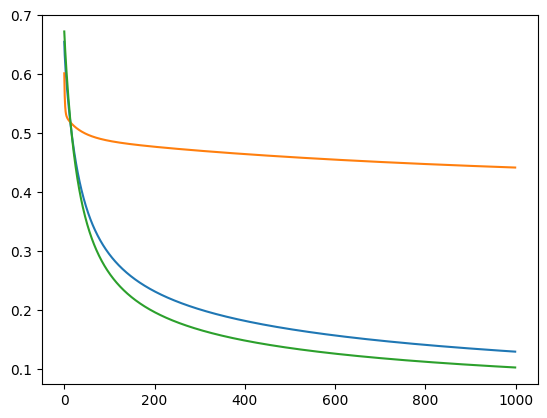

In [28]:
theta_1, history = fit(x_train, y_train[:, 0], alpha=1, max_iter=1000)
print(theta_1)
plt.plot(history)

theta_2, history = fit(x_train, y_train[:, 1], alpha=1, max_iter=1000)
print(theta_2)
plt.plot(history)

theta_3, history = fit(x_train, y_train[:, 2], alpha=1, max_iter=1000)
print(theta_3)
plt.plot(history)

In [31]:
y_pred_0 = predict(x_test, theta_1)
y_pred_1 = predict(x_test, theta_2)
y_pred_2 = predict(x_test, theta_3)

y_pred =  np.array([y_pred_0, y_pred_1, y_pred_2]).T
y_pred = softmax(y_pred)
print(y_pred)

y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[[0.27319479 0.32796947 0.39883575]
 [0.23017507 0.26994382 0.49988111]
 [0.20864569 0.23247757 0.55887674]
 [0.20889511 0.2241189  0.566986  ]
 [0.44907257 0.31689387 0.23403356]
 [0.42059802 0.31704092 0.26236106]
 [0.41304473 0.33194904 0.25500623]
 [0.20956615 0.24185201 0.54858184]
 [0.23309179 0.30231619 0.46459203]
 [0.28461219 0.32862868 0.38675913]
 [0.26630931 0.30905812 0.42463257]
 [0.2209633  0.26876892 0.51026779]
 [0.21024993 0.21828732 0.57146275]]
[2 2 2 2 0 0 0 2 2 2 2 2 2]


In [36]:
for i in range(y_pred.size):
    print("pred : ",y_pred[i],"test : ", np.argmax(y_test[i]), y_pred[i] == np.argmax(y_test[i]))

pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  0 test :  0 True
pred :  0 test :  1 False
pred :  0 test :  0 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
pred :  2 test :  2 True
